/Users/conorbarrycullen/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


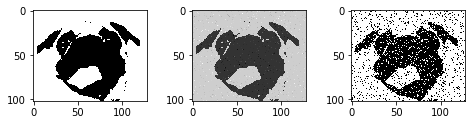

In [2]:
#Shows the original image and some noisy ones
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
import random
def add_gaussian_noise(im,prop,varSigma):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    e = varSigma*np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im)
    im2[index] += e[index]
    return im2
def add_saltnpeppar_noise(im,prop):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    im3 = np.copy(im)
    im3[index] = 1-im3[index]
    return im3
# proportion of pixels to alter
prop = 0.1
varSigma = 0.1
im = imread('pug.png')
im = im/255
fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im,cmap='gray')

im2 = add_gaussian_noise(im,prop,varSigma)
ax2 = fig.add_subplot(132)
ax2.imshow(im2,cmap='gray')
pos1 = ax2.get_position() # get the original position 
pos2 = [pos1.x0 + 0.1, pos1.y0,  pos1.width, pos1.height] 
ax2.set_position(pos2) # set a new position

im3 = add_saltnpeppar_noise(im,prop)
ax3 = fig.add_subplot(133)
ax3.imshow(im3,cmap='gray')
pos3 = ax3.get_position() # get the original position 
pos4 = [pos3.x0 + 0.2, pos3.y0,  pos3.width, pos3.height] 
ax3.set_position(pos4) # set a new position

plt.subplots_adjust(wspace=0.4, hspace=0.4, top=1, bottom=0.1, left=0, right=1)
plt.show()

In [3]:
#Neighbour function
def neighbours(i,j,M,N,size=4):
    # Can expand to size = 8 if i fancy for better results :)
    if size == 4:
        if (i == 0 and j == 0):
            n = [(0,1),(1,0)]
        elif i == 0 and j == N-1:
            n = [(0,N-2),(1,N-1)]
        elif i == M-1 and j == 0:
            n = [(M-1,1),(M-2,0)]
        elif i == M-1 and j == N-1:
            n = [(M-1,N-2),(M-2,N-1)]
        elif i == 0:
            n = [(0,j-1),(0,j+1),(1,j)]
        elif i == M-1:
            n = [(M-1,j-1),(M-1,j+1),(M-2,j)]
        elif j == 0:
            n = [(i-1,0),(i+1,0),(i,1)]
        elif j == N-1:
            n = [(i-1,N-1),(i+1,N-1),(i,N-2)]
        else:
            n = [(i-1,j),(i+1,j),(i,j-1),(i,j+1)]
            
        return n
    elif size == 8:
        if (i == 0 and j == 0):
            n = [(0,1),(1,1),(1,0)]
        elif i == 0 and j == N-1:
            n = [(0,N-2),(1,N-1),(1,N-1)]
        elif i == M-1 and j ==0:
            n = [(M-1,1),(M-2,1),(M-2,0)]
        elif i == M-1 and j == N-1:
            n = [(M-1,N-2),(M-2,N-2),(M-2,N-1)]
        elif i == 0:
            n = [(0,j-1),(1,j-1),(0,j+1),(1,j+1),(1,j)]
        elif i == M-1:
            n = [(M-1,j-1),(M-2,j-1),(M-1,j+1),(M-2,j+1),(M-2,j)]
        elif j == 0:
            n = [(i-1,0),(i-1,1),(i+1,0),(i+1,1),(i,1)]
        elif j == N-1:
            n = [(i-1,N-1),(i-1,N-2),(i+1,N-1),(i+1,N-2),(i,N-2)]
        else:
            n = [(i-1,j),(i-1,j-1),(i+1,j),(i+1,j+1),(i,j-1),(i+1,j-1),(i,j+1),(i-1,j+1)]
             
        return n      

Total Energy -3.2206201767908795


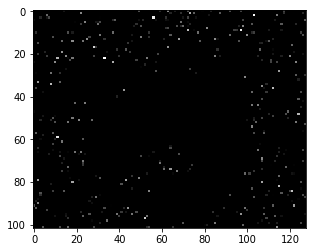

In [29]:
#Question 1

gaussImage = im2
def EoX(Image, HiddenImage, Coord):
    A = HiddenImage.shape[0]
    B = HiddenImage.shape[1]
    TotalPixels = A*B #Shape of Image and HiddenImage are equivalent :)
    Neighbours = neighbours(Coord[0],Coord[1],A,B)
    #print(Neighbours)
    energy = 0
    for dude in Neighbours:
        x_n = dude[0]
        y_n = dude[1]
        #print(dude)
        energy += HiddenImage[Coord[0],Coord[1]]*HiddenImage[dude[0],dude[1]]
    energy = -energy/TotalPixels
    return energy

def TotalE (Image, HiddenImage):
    energy = 0
    A = Image.shape[0]
    B = Image.shape[1]
    #print([A, B])
    #print(list(range(A)))
    for a in range(A):    
        for b in range(B):
            Coord = [a,b]
            energy += EoX(Image, HiddenImage, Coord)
    return energy

#SecretPic = np.copy(gaussImage)


def ICMaPoint (Image, HiddenImage, Coord, Energy):
    currentE = EoX(Image, HiddenImage,Coord)
    diffE = Energy - currentE
    
    #Flipped Version of HiddenImage
    HidingHiddenImage = np.copy(HiddenImage)
    if HiddenImage[Coord[0],Coord[1]] == 1:
        HidingHiddenImage[Coord[0],Coord[1]] = 0
    else:
        HidingHiddenImage[Coord[0],Coord[1]] = 1  
    #Does flipping the pixel reduce the energy?
    flippedE = EoX(Image, HidingHiddenImage, Coord)
    
    if flippedE < currentE:
        FLIP = True
        Energy = diffE + flippedE
        HiddenImage = HidingHiddenImage
    else:
        FLIP = False
        
    return (HiddenImage,FLIP,Energy)

workImage = gaussImage # CHANGE THIS ONE!
MaxIters = 10


#workImage[workImage <= 0.5] = -1 #make the issue a closed discrete form
#workImage[workImage > 0.5] = 1
hiddenIm = np.copy(workImage)


TotalEnergy = TotalE(workImage,hiddenIm)
energyNow = TotalEnergy 

[A,B] = gaussImage.shape

#print(A)
for Iters in range(MaxIters):
    for a in range(A):
        for b in range(B):
            Coord = [a,b]
            hiddenIm, Flip, TotalEnergy = ICMaPoint(workImage,hiddenIm,Coord,TotalEnergy)
            #print(b)
        #print(a)
    if (TotalEnergy - energyNow) == 0:
        break
    energyNow = TotalEnergy
    print("Total Energy",TotalEnergy)
    
fig = plt.figure
plt.imshow(hiddenIm, cmap='gray')

100%|██████████| 120/120 [01:23<00:00,  1.37it/s]


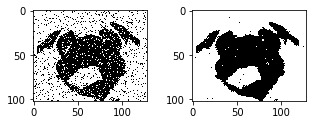

In [23]:
#Question 2,3,4

np.random.seed(42)
from tqdm import tqdm


def local_energy(Y, x, y):
    #initialise total energy to 0
    energy = 0
    #arbitrary weight
    weight = 0.7
    #get the neighbours of pixel
    for nx, ny in neighbours(x, y, Y.shape[0], Y.shape[1]):
        energy += weight * Y[x, y] * Y[nx, ny]
        for nxx, nyy in neighbours(nx, ny, Y.shape[0], Y.shape[1]):
            energy += weight * Y[nx, ny] * Y[nxx, nyy]
    return energy
    
def posterior(x, y, xi, image,Y):
    Y[x, y] = xi
    
    x_i = Y[x, y] + 1 / 2; #Univariate index of pixel
    y_i = image[x, y]
    #if x_i=y_i then L_i = 0 (i.e. e^L_i = 1) else L_i < 0 (i.e. e^L_i < 1)
    L_i = -np.abs(x_i - y_i)
    #L_i in Ising Model
    likelihood = np.exp(L_i)

    #E_0(x) in Ising Model
    prior = local_energy(Y, x, y)
    
    #Posterior is p(x,y)
    return likelihood * prior
    
    
    
def gibbs_sample(image, Y, x, y):
    
    #Posterior form used in Algorithm 3
    numer  = posterior(x, y, 1, image, Y)
    denom = numer + posterior(x, y, -1, image, Y)
    p = numer / denom
    
    #Choose random uniform number and sample if prob is greater
    if p > random.uniform(0, 1):
        Y[x, y] = 1
    else:
        Y[x, y] = -1
        
    
def denoise(image, Y, iterations):
    
    M = Y.shape[0]
    N = Y.shape[1]
    
    avg = np.zeros_like(Y).astype(np.float64)

    for t in tqdm(range(iterations)):
        for k in range(N*M):
            #Use these for Question 2
            y = k % N
            x = (k - y) // N
            #Use these for Question 3
            #y = np.floor(np.random.uniform(1, N)).astype(int) # pick a random row iy
            #x = np.floor(np.random.uniform(1, M)).astype(int) # pick a random col ix
            
            gibbs_sample(image, Y, x, y)
            
            #Throw away initial samples when we haven't converged 
            if t>100:
                avg += Y
    
    return avg / iterations
    

prop = 0.1
varSigma = 0.1
#Other noise levels used:
#prop = 0.8
#varSigma = 0.8

#Choose Gaussian or salt and pepper
gauss_image = add_gaussian_noise(im,prop,varSigma)
salty_image = add_saltnpeppar_noise(im,prop)
#Make copy of chosen image
image = salty_image
Y = np.copy(image)

#Denoise the image
iterations = 120
new_image = denoise(image, Y, iterations)
new_image[new_image >= 0] = 1
new_image[new_image < 0]  = -1

fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.imshow(image,cmap='gray')
ax2 = fig.add_subplot(132)
ax2.imshow(new_image,cmap='gray')
pos1 = ax2.get_position() # get the original position 
pos2 = [pos1.x0 + 0.1, pos1.y0,  pos1.width, pos1.height] 
ax2.set_position(pos2) # set a new position

plt.subplots_adjust(wspace=0.4, hspace=0.4, top=1, bottom=0.1, left=0, right=1)
plt.show()

100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


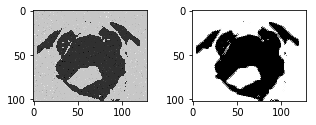

In [28]:
#Question 6
from scipy.special import expit as sigmoid
from scipy.stats import multivariate_normal
import math
from tqdm import tqdm

prop = 0.1
varSigma = 0.1
#Other noise levels used:
#prop = 0.8
#varSigma = 0.8

#Choose Gaussian or salt and pepper
gauss_image = add_gaussian_noise(im,prop,varSigma)
salty_image = add_saltnpeppar_noise(im,prop)
#Make copy of chosen image
image = gauss_image
y = image #Noisy image
y = np.copy(y) * 2 - 1

w_ij = 1 #Weight
max_iter = 1
[M,N] = y.shape


logodds = multivariate_normal.logpdf(y.flatten(), mean=+1, cov=varSigma**2) - \
          multivariate_normal.logpdf(y.flatten(), mean=-1, cov=varSigma**2)
logodds = np.reshape(logodds, (M, N))

#init
q = sigmoid(logodds)
mu = 2*q-1  #mu_init

for i in tqdm(range(max_iter)):
    for ix in range(M):
        for iy in range(N):
            neighbourhood = neighbours(ix, iy,image.shape[0],image.shape[1])
            m = sum(w_ij * y[nx, ny] for nx, ny in neighbourhood)
            #Update mean
            mu[ix,iy] = np.tanh(m + 0.5*(logodds[ix, iy] - logodds[ix, iy])) - \
                        np.tanh(m + 0.5*(logodds[ix, iy] - logodds[ix, iy]))
            #Update q(x)
            q[ix,iy] = sigmoid(2*(m + 0.5*(logodds[ix, iy] - logodds[ix, iy]))) - \
                        sigmoid(2*-(m + 0.5*(logodds[ix, iy] - logodds[ix, iy])))
            
#Clean image
new_image = q
    
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.imshow(image,cmap='gray')
ax2 = fig.add_subplot(132)
ax2.imshow(new_image,cmap='gray')
pos1 = ax2.get_position() # get the original position 
pos2 = [pos1.x0 + 0.1, pos1.y0,  pos1.width, pos1.height]
ax2.set_position(pos2) # set a new position

plt.subplots_adjust(wspace=0.4, hspace=0.4, top=1, bottom=0.1, left=0, right=1)
plt.show()